In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"



import jax
import jax.numpy as jnp




device = jax.devices("gpu")[1]

jax._src.config.update("jax_default_device", device)

array = jnp.array([1.0], device=device)
print(array.device)

print(jax.devices())
print(jax.default_device())

array = jnp.array([1.0])
print(array.device)

array = jnp.array([1.0])
print(array.device)

cuda:1
[CudaDevice(id=0), CudaDevice(id=1)]
cuda:1
cuda:1


In [ ]:
import optax
import matplotlib.pyplot as plt
from diffusers.optimization import get_scheduler

In [6]:
lr = optax.warmup_exponential_decay_schedule(
    init_value=1e-4,
    peak_value=1e-3,
    warmup_steps=10,
    transition_begin=500,
    decay_rate=0.9,
    transition_steps=490,
)

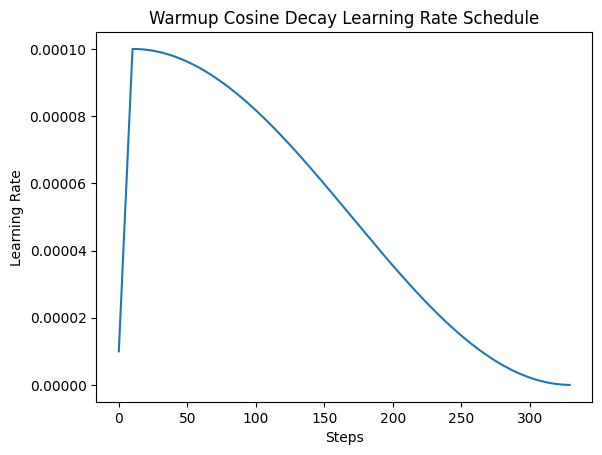

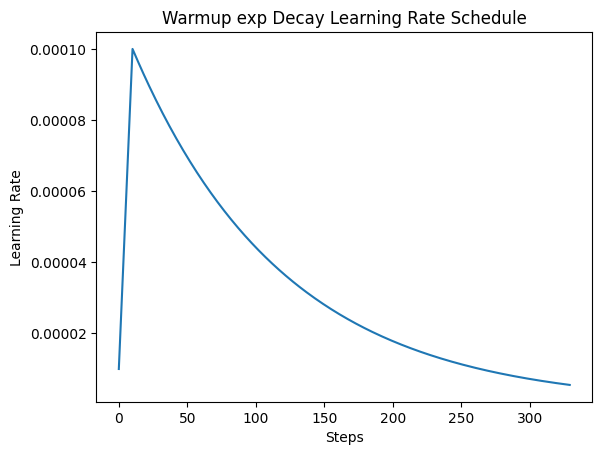

: 

In [ ]:
lr = optax.warmup_cosine_decay_schedule(
    init_value=1e-5,
    peak_value=1e-4,
    warmup_steps=10,
    decay_steps=5*66,
)

lr_values = [lr(i) for i in range(5*66)]



# plt.axvline(x=20*66, color='r', linestyle='--')
plt.plot(lr_values)
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.title('Warmup Cosine Decay Learning Rate Schedule')
plt.show()


lr = optax.warmup_exponential_decay_schedule(
    init_value=1e-5,
    peak_value=1e-4,
    warmup_steps=10,
    decay_rate=0.05,
    transition_steps=5*66,
)

plt.plot([lr(i) for i in range(5*66)])
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.title('Warmup exp Decay Learning Rate Schedule')
plt.show()


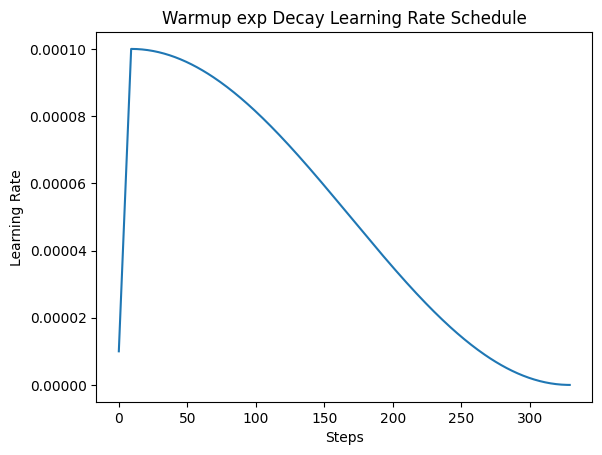

First value 1e-05
Peak value 0.0001
Last value 0.0


In [19]:
import torch
from torchvision.models import resnet18
from diffusers.optimization import get_scheduler


noise_pred_net = resnet18()

optimizer = torch.optim.AdamW(
    params=noise_pred_net.parameters(),
    lr=1e-4, weight_decay=1e-6)

lr_scheduler = get_scheduler(
    name='cosine',
    optimizer=optimizer,
    num_warmup_steps=10,
    num_training_steps=5*66
)

lr_values = []
for _ in range(5*66):
    optimizer.step()
    lr_scheduler.step()
    lr_values.append(lr_scheduler.get_last_lr()[0])

plt.plot(lr_values)
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.title('Warmup exp Decay Learning Rate Schedule')
plt.show()

print("First value", lr_values[0])
print("Peak value", max(lr_values))
print("Last value", lr_values[-1])
